In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
)

# Загрузка данных
df = pd.read_csv("cleaned_merged_heart_dataset.csv")

X = df.drop(columns=["target"])
y = df["target"]

# Деление на выборки
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [2]:
# Обучение модели SVM
svm = SVC(probability=True, kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [4]:
def evaluate_model(model, X, y, name=""):
    y_prob = model.predict_proba(X)[:, 1]
    y_pred = model.predict(X)
    print(f"\n{name} Metrics:")
    print(f"ROC AUC:   {roc_auc_score(y, y_prob):.4f}")
    print(f"Accuracy:  {accuracy_score(y, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall:    {recall_score(y, y_pred):.4f}")

# Оценка на всех выборках
evaluate_model(svm, X_train, y_train, "Train")
evaluate_model(svm, X_valid, y_valid, "Validation")
evaluate_model(svm, X_test, y_test, "Test")


Train Metrics:
ROC AUC:   0.9757
Accuracy:  0.9402
F1 Score:  0.9426
Precision: 0.9365
Recall:    0.9488

Validation Metrics:
ROC AUC:   0.9583
Accuracy:  0.9152
F1 Score:  0.9189
Precision: 0.9067
Recall:    0.9315

Test Metrics:
ROC AUC:   0.9437
Accuracy:  0.8873
F1 Score:  0.8961
Precision: 0.8571
Recall:    0.9388


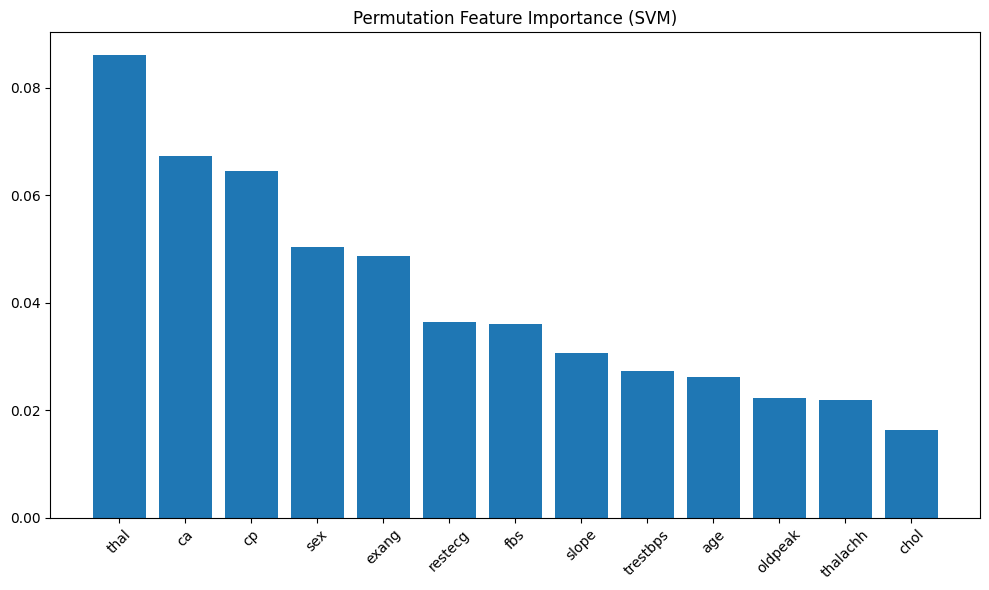

In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm, X_train, y_train, n_repeats=10, random_state=42)

# Отобразим важность
import matplotlib.pyplot as plt

features = df.drop(columns=['target']).columns
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Permutation Feature Importance (SVM)")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
